In [1]:
import numpy as np
import swiftestio as swio
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
param = swio.read_swifter_param(inparfile)
swifterdat = swio.swifter2xr(param)

Reading Swifter file param.swifter.in


In [3]:
config_file_name = 'config.swiftest.in'
config = swio.read_swiftest_config(config_file_name)
swiftestdat = swio.swiftest2xr(config)

Reading Swiftest file config.swiftest.in


In [4]:
swiftdiff = swiftestdat - swifterdat

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (d)'})

In [25]:
swiftestdat['e'].sel(id=3)

<xarray.DataArray 'e' (time: 366)>
array([0.99999245, 0.99999245, 0.99999245, 0.99999245, 0.99999245,
       0.99999245, 0.99999245, 0.99999245, 0.99999245, 0.99999245,
       0.99999245, 0.99999245, 0.99999245, 0.99999245, 0.99999245,
       0.99999245, 0.99999245, 0.99999246, 0.99999246, 0.99999246,
       0.99999246, 0.99999245, 0.99999245, 0.99999245, 0.99999245,
       0.99999245, 0.99999245, 0.99999245, 0.99999245, 0.99999245,
       0.99999245, 0.99999245, 0.99999245, 0.99999245, 0.99999245,
       0.99999245, 0.99999245, 0.99999245, 0.99999245, 0.99999246,
       0.99999246, 0.99999246, 0.99999246, 0.99999246, 0.99999246,
       0.99999246, 0.99999246, 0.99999246, 0.99999246, 0.99999246,
       0.99999246, 0.99999246, 0.99999246, 0.99999246, 0.99999246,
       0.99999246, 0.99999246, 0.99999247, 0.99999247, 0.99999247,
       0.99999247, 0.99999247, 0.99999247, 0.99999247, 0.99999248,
       0.99999249, 0.99999264, 0.9999928 , 0.99999281, 0.99999282,
       0.99999282, 0.99999283, 0.99999283, 0.99999283, 0.99999283,
       0.99999283, 0.99999283, 0.99999283, 0.99999283, 0.99999283,
       0.99999283, 0.99999283, 0.99999283, 0.99999284, 0.99999284,
       0.99999284, 0.99999284, 0.99999284, 0.99999284, 0.99999284,
       0.99999284, 0.99999284, 0.99999284, 0.99999284, 0.99999284,
       0.99999284, 0.99999284, 0.99999284, 0.99999284, 0.99999284,
...
       0.99999318, 0.99999318, 0.99999318, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.99999319, 0.99999319, 0.99999319, 0.99999319,
       0.99999319, 0.9999932 , 0.99999319, 0.99999319, 0.9999932 ,
       0.9999932 , 0.9999932 , 0.99999321, 0.99999321, 0.99999321,
       0.99999321, 0.99999322, 0.99999322, 0.99999322, 0.99999322,
       0.99999322, 0.99999322, 0.99999322, 0.99999322, 0.99999322,
       0.99999322])
Coordinates:
    id       int64 3
  * time     (time) float64 0.0 0.002738 0.005476 ... 0.9938 0.9966 0.9993

In [6]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

In [7]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 10]
tpidx = swiftdiff.id.values[swiftdiff.id.values > 10]

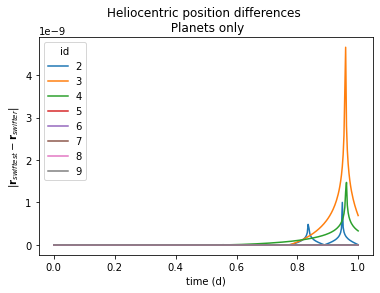

In [8]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-mars_ejecta-planets-rmag.png", facecolor='white', transparent=False, dpi=300)

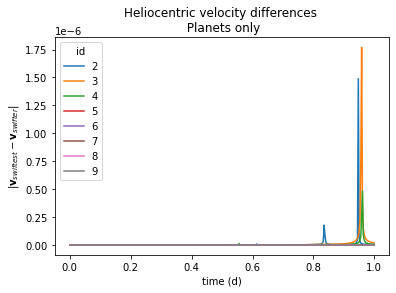

In [9]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-mars_ejecta-planets-vmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


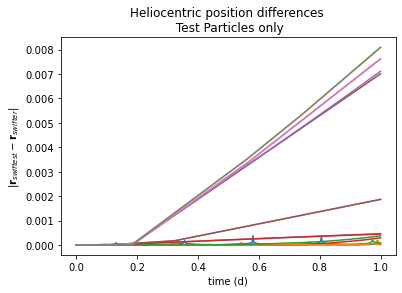

In [10]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-mars_ejecta-testparticles-rmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


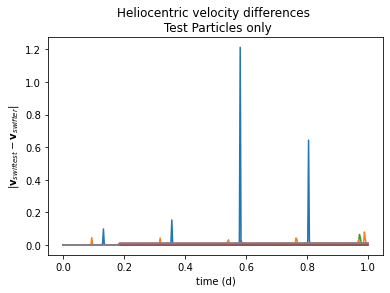

In [11]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-mars_ejecta-testparticles-vmag.png", facecolor='white', transparent=False, dpi=300)